In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("datasets/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [6]:
print(f"Before: {df["Age"].isna().sum()}")

df['Age'] = df['Age'].fillna(value=df['Age'].median())

print(f"After: {df["Age"].isna().sum()}")

Before: 177
After: 0


In [7]:
print(f"Before: {df.shape[0]}")

z = zscore(df["Age"])
df = df[np.abs(z) <= 3]

print(f"After: {df.shape[0]}")

Before: 891
After: 884


In [8]:
x = df[["Sex", "Age", "Pclass"]]
y = df["Survived"]

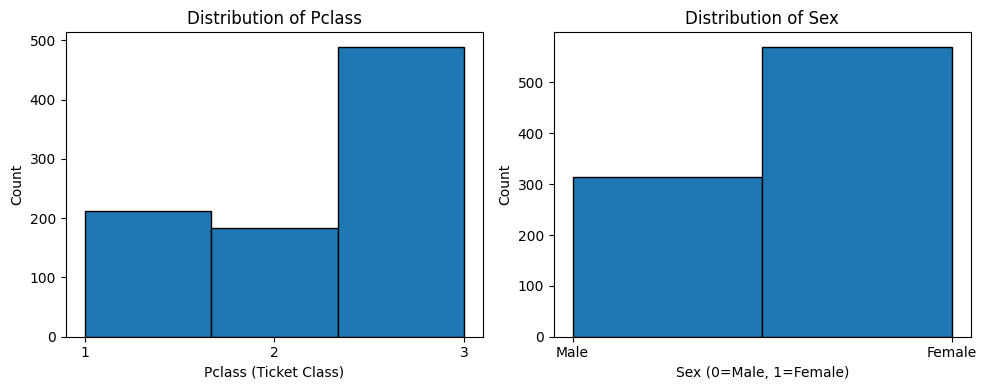

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(x['Pclass'], bins=3, edgecolor='black')  
ax1.set_xlabel('Pclass (Ticket Class)')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Pclass')
ax1.set_xticks([1, 2, 3])

ax2.hist(x['Sex'], bins=2, edgecolor='black')  
ax2.set_xlabel('Sex (0=Male, 1=Female)')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Sex')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Male', 'Female'])


plt.tight_layout()
plt.show()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
model = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],        
    'solver': ['liblinear', 'saga'],      
    'max_iter': [100, 200, 500]         
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1 
)
grid_search.fit(x_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8048646488862252


In [13]:
model = LogisticRegression(C=0.01, max_iter=100, penalty="l2", solver="saga")
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7740112994350282
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       105
           1       0.76      0.65      0.70        72

    accuracy                           0.77       177
   macro avg       0.77      0.75      0.76       177
weighted avg       0.77      0.77      0.77       177



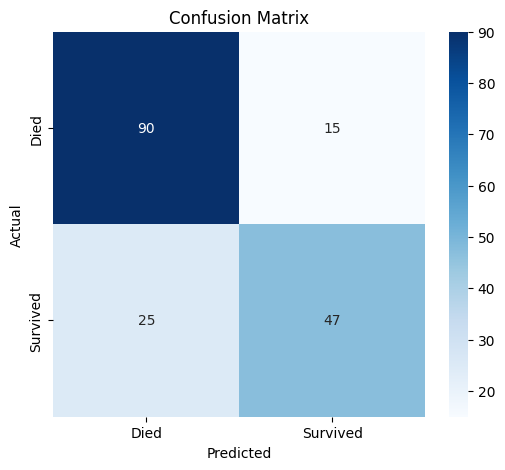

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died','Survived'], yticklabels=['Died','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()